<a href="https://colab.research.google.com/github/aayush1607/Detection-of-Offensive-Language-on-Social-Media/blob/main/LSTM_for_Offensive_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_scraped = pd.read_csv('./labeled_tweets.csv')
df_public = pd.read_csv('./public_data_labeled.csv')

In [3]:
df_scraped.drop_duplicates(inplace = True)
df_scraped.drop('id', axis = 'columns', inplace = True)

df_public.drop_duplicates(inplace = True)

In [4]:
df_scraped.head(2)

,label,full_text
0,Offensive,So Drasko just said he was impressed the girls...
2,Offensive,Drasko they didn't cook half a bird you idiot ...


In [5]:
df_public.head(2)

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [6]:
df = pd.concat([df_scraped, df_public])

In [7]:
df.shape

(35787, 2)

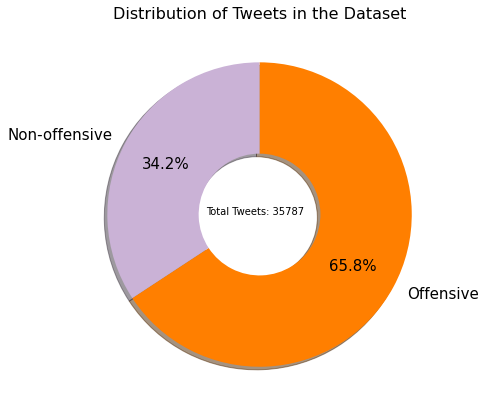

In [8]:
plt.figure(figsize = (7,7))
sorted_counts = df['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(df.shape[0]))
plt.title('Distribution of Tweets in the Dataset', fontsize = 16);

In [9]:
df['label'] = df.label.map({'Offensive': 1, 'Non-offensive': 0})

In [10]:
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical

tweets = list(df['full_text'])
labels= list(df['label'])
print('labels: ',labels)

# Feature extraction
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# integer encode the documents
sequences = tokenizer.texts_to_sequences(tweets)

# pad documents to a max length of 14 words
maxlen = 14
X = pad_sequences(sequences, maxlen=maxlen)
y = to_categorical(labels, 2)
print('X shape',X.shape)
print('y shape',y.shape)
print('X',X)
print('y',y)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print('training dataset len:', len(X_train))
print('testing dataset len:', len(X_test))
print('X train',X_train)
print('y train',y_train)
print('X test',X_test)
print('y test',y_test)

# Prepare hyperparameters of RNN
vocab_size = len(word_index)+1
output_dim = 32

# LSTM
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = output_dim, input_length = maxlen))
model.add(LSTM(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(output_dim, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(output_dim, kernel_constraint=maxnorm(3)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
warnings.filterwarnings("ignore")

labels:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 32)            1535008   
                                                                 
 lstm (LSTM)                 (None, 14, 32)            8320      
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 14, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 2)                 6

In [13]:
import time
start = time.time()

# Fit the model to the training set
lstm_hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3)
# Final evaluation of the model
warnings.filterwarnings("ignore")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")
end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))

Epoch 1/10
548/548 [==============================] - 30s 22ms/step - loss: 0.3479 - accuracy: 0.8376 - val_loss: 0.2709 - val_accuracy: 0.8826
Epoch 2/10
548/548 [==============================] - 11s 20ms/step - loss: 0.1627 - accuracy: 0.9357 - val_loss: 0.3094 - val_accuracy: 0.8752
Epoch 3/10
548/548 [==============================] - 12s 22ms/step - loss: 0.0803 - accuracy: 0.9714 - val_loss: 0.3914 - val_accuracy: 0.8683
Epoch 4/10
548/548 [==============================] - 11s 20ms/step - loss: 0.0461 - accuracy: 0.9843 - val_loss: 0.4323 - val_accuracy: 0.8648
Epoch 5/10
548/548 [==============================] - 11s 19ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.5633 - val_accuracy: 0.8660
Epoch 6/10
548/548 [==============================] - 12s 22ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.6367 - val_accuracy: 0.8643
Epoch 7/10
548/548 [==============================] - 10s 19ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.6131 - val_accuracy:

In [14]:
# Save the LSTM model
model.save('lstm.h5')

In [15]:
import seaborn as sn
from sklearn.metrics import confusion_matrix,f1_score,classification_report
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()

True positive =  10982
False positive =  1274
False negative =  1334
True negative =  22197




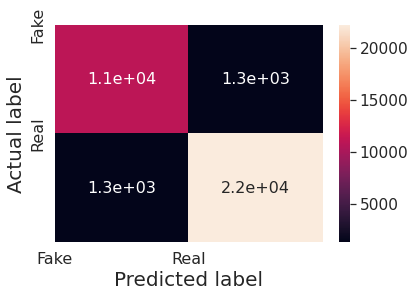

f1 score (LSTM) : 0.9445129994468321 

Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     12256
           1       0.95      0.94      0.94     23531

    accuracy                           0.93     35787
   macro avg       0.92      0.92      0.92     35787
weighted avg       0.93      0.93      0.93     35787



In [18]:
from tensorflow import keras
lstm_model = keras.models.load_model('./lstm.h5')

print_confusion_matrix(labels, np.argmax(lstm_model.predict(X),axis=-1))
f1 = f1_score(labels, np.argmax(lstm_model.predict(X),axis=-1))
cr = classification_report(labels, np.argmax(lstm_model.predict(X),axis = -1))
print(f'f1 score (LSTM) : {f1} \n')
print(f'Classification report : \n{cr}')